## This Model Will Not Work Well
there is too little data -- that being said we can learn something important about the application of models from this example

In [46]:
import pandas as pd
import joblib

In [47]:
df = pd.read_csv('datasets/house.csv')

In [48]:
df_dummy = pd.get_dummies(data=df, drop_first=True)

In [49]:
df_dummy.head()

,SqFt,Bedrooms,Bathrooms,Offers,Price,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1790,2,2,2,114300,0,0,0
1,2030,4,2,3,114200,0,0,0
2,1740,3,2,1,114800,0,0,0
3,1980,3,2,3,94700,0,0,0
4,2130,3,3,3,119800,0,0,0


In [53]:
x = df_dummy.drop(columns=['Price'])
y = df_dummy['Price']

In [54]:
# Build a pipeline function to make pre-processing easier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error
import joblib

def data_split_standardise(x,y=None):
    if y is None:
        st=StandardScaler()
        st.fit(x)
        x_std=st.transform(x)
        joblib.dump(st,"model_objects/StandardScalar_trained.h5")
        return(x_std)
    else:

        
        
        
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
        st=StandardScaler()
        st.fit(x_train)
        x_train_std=st.transform(x_train)
        x_test_std=st.transform(x_test)
        joblib.dump(st,"model_objects/StandardScalar_trained.h5")    
        return (x_train_std, x_test_std, y_train, y_test)

In [55]:
x_train_std, x_test_std, y_train, y_test = data_split_standardise(x,y)

In [56]:
n_features = x_train_std.shape[1]

In [57]:
# build the network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.regularizers import L1, L2
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
model = Sequential()
model.add(Input(shape=(n_features)))

# hidden layer with 10 nodes
model.add(Dense(10,activation='relu'))
# Batch Normalization Layer
model.add(BatchNormalization())

# hidden layer with 12 nodes
model.add(Dense(12,activation='relu'))
# Batch Normalization Layer
model.add(BatchNormalization())

# output layer
model.add(Dense(1,activation='relu'))

#compile the model
model.compile(loss='mse',metrics=['mae'],optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                80        
                                                                 
 batch_normalization_3 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 12)                132       
                                                                 
 batch_normalization_4 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
Total params: 313
Trainable params: 269
Non-trainable 

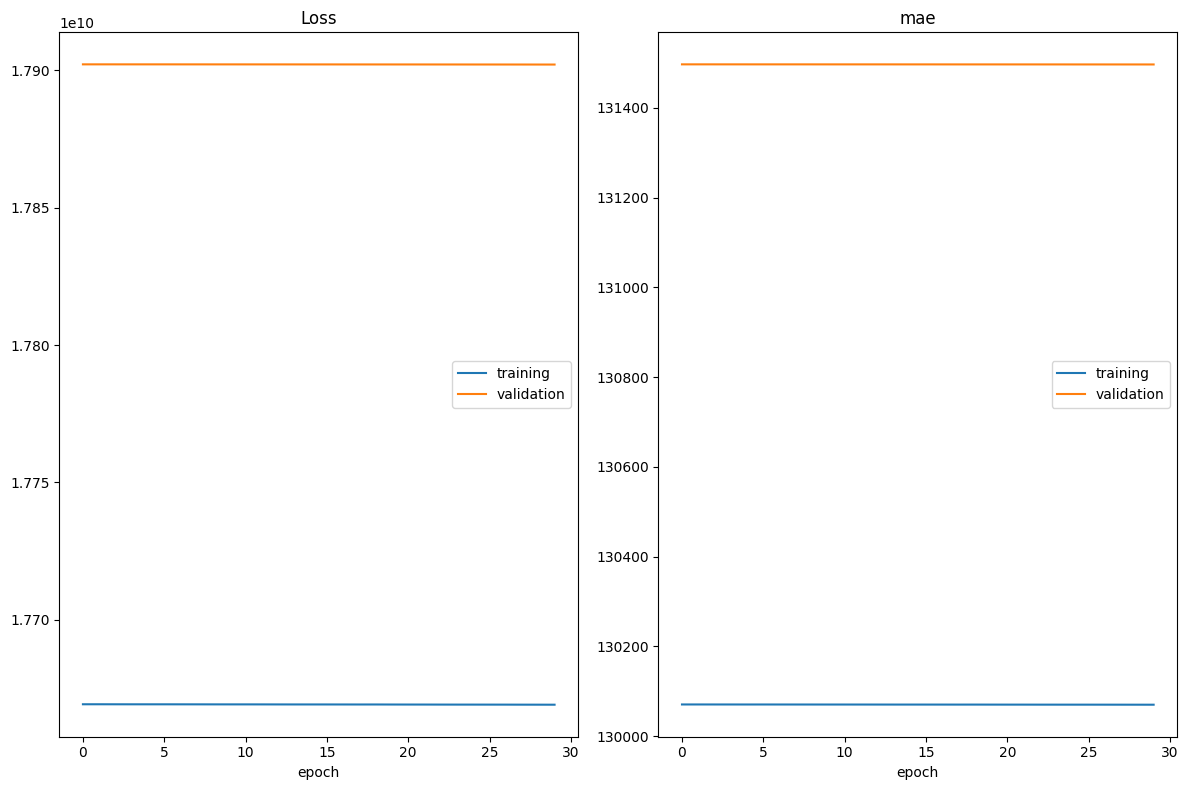

Loss
	training         	 (min: 17669115904.000, max: 17669275648.000, cur: 17669115904.000)
	validation       	 (min: 17902049280.000, max: 17902120960.000, cur: 17902049280.000)
mae
	training         	 (min: 130069.852, max: 130070.398, cur: 130069.852)
	validation       	 (min: 131496.594, max: 131496.844, cur: 131496.594)
2/2 [==============================] - 0s 434ms/step - loss: 17669115904.0000 - mae: 130069.8516 - val_loss: 17902049280.0000 - val_mae: 131496.5938


In [59]:
model.fit(
    x_train_std,
    y_train,epochs=30,
    batch_size=64,
    validation_data=(x_test_std,y_test),
    callbacks=[PlotLossesKerasTF()]
)

In [60]:
# try a new structure with L2 regularization

model2 = Sequential()
model2.add(Input(shape=(n_features)))

# hidden layer with 5 nodes
model2.add(Dense(5,activation='relu',kernel_regularizer=L2(l2=0.01)))  # L2 penalty application

# hidden layer with 12 nodes
model2.add(Dense(12,activation='relu'))
# Batch Normalization Layer
model2.add(BatchNormalization())

# output layer
model2.add(Dense(1,activation='relu'))

#compile the model
model2.compile(loss='mse',metrics=['mae'],optimizer='adam')
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 40        
                                                                 
 dense_10 (Dense)            (None, 12)                72        
                                                                 
 batch_normalization_5 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 173
Trainable params: 149
Non-trainable params: 24
_________________________________________________________________


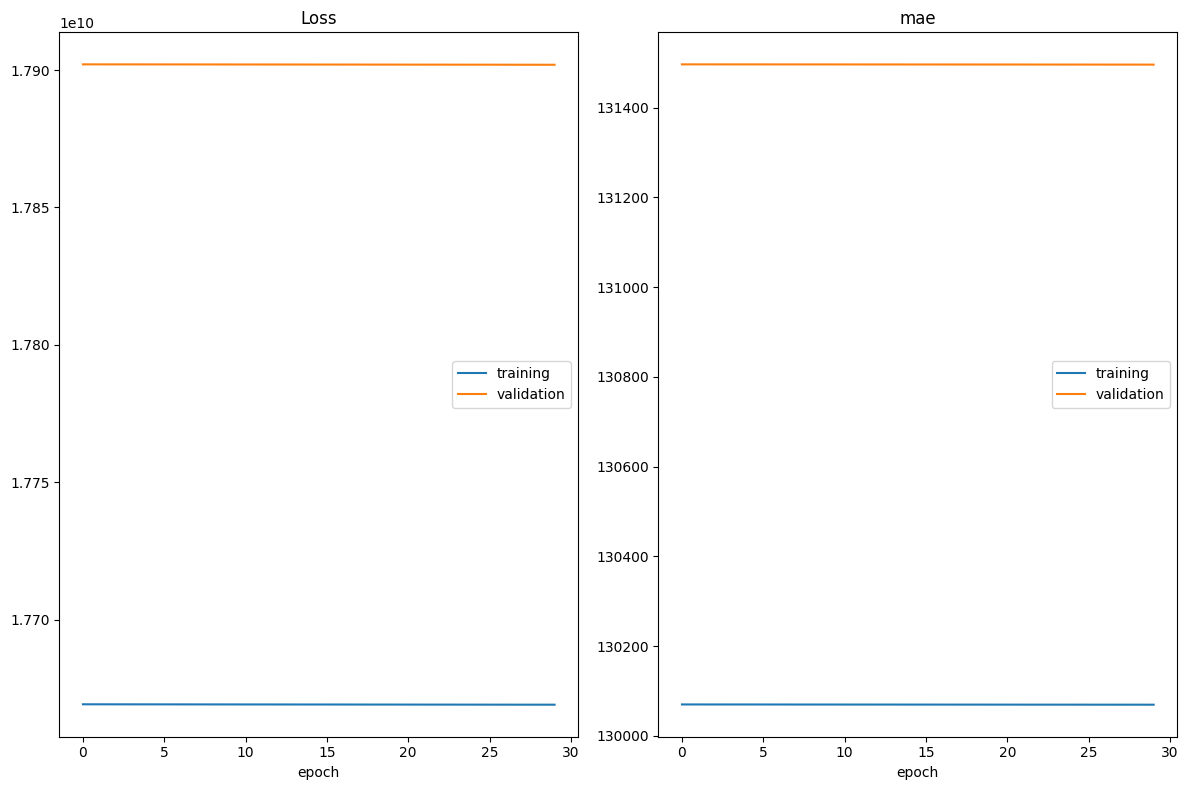

Loss
	training         	 (min: 17669083136.000, max: 17669232640.000, cur: 17669083136.000)
	validation       	 (min: 17901928448.000, max: 17902077952.000, cur: 17901928448.000)
mae
	training         	 (min: 130069.625, max: 130070.211, cur: 130069.625)
	validation       	 (min: 131496.094, max: 131496.688, cur: 131496.094)
2/2 [==============================] - 1s 535ms/step - loss: 17669083136.0000 - mae: 130069.6250 - val_loss: 17901928448.0000 - val_mae: 131496.0938


In [61]:
model2.fit(
    x_train_std,
    y_train,epochs=30,
    batch_size=64,
    validation_data=(x_test_std,y_test),
    callbacks=[PlotLossesKerasTF()]
)

## Applying the Model on New Data

In [73]:
df_new = pd.read_csv('datasets/house new data for pred.csv')
df_new.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1520,2,1,1,Yes,East
1,1650,3,2,1,No,East
2,1800,3,2,1,Yes,North


In [74]:
df_new.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1520,2,1,1,Yes,East
1,1650,3,2,1,No,East
2,1800,3,2,1,Yes,North


In [64]:
df_new_dummy = pd.get_dummies(data=df_new, drop_first=True)
df_new_dummy.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North
0,1520,2,1,1,1,0
1,1650,3,2,1,0,0
2,1800,3,2,1,1,1


In [65]:
sc = joblib.load('model_objects/StandardScalar_trained.h5')

In [66]:
model2.predict(sc.transform(df_new_dummy))

/usr/local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Neighborhood_West

  warnings.warn(message, FutureWarning)


ValueError: X has 6 features, but StandardScaler is expecting 7 features as input.

In [ ]:
# We need to pre-process out input data to make sure that it fits the same structure as what we built the model on
# basically we're missing a dummy column because it didn't appear as a class in the input

def preProcessColumns(new_data, cols):
    for c in cols:
        if c not in new_data.columns:
            new_data[c] = 0     # set new column value to 0 if it doesn't appear
    return new_data

In [75]:
df_new_processed = preProcessColumns(df_new_dummy,x.columns)
df_new_processed.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Price,Neighborhood_West
0,1520,2,1,1,1,0,0,0
1,1650,3,2,1,0,0,0,0
2,1800,3,2,1,1,1,0,0


In [76]:
model2.predict(sc.transform(df_new_processed))

/usr/local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price

  warnings.warn(message, FutureWarning)


ValueError: X has 8 features, but StandardScaler is expecting 7 features as input.